# Data Preprocessing

In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.preprocessing import FunctionTransformer
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_rows = 999

In [3]:
sns.set_palette('Set2')

In [4]:
sns.set_palette('Paired')

In [5]:
sns.set_context('paper')

In [6]:
pd.set_option("display.max_rows", 3000)
pd.set_option("display.max_columns", 300)

## Import data

The data is now imported into three DataFrames:  
- df: the entire labeled dataset (1460 observations)
- df_train: 80% of the labeled dataset to train the model (1168 observations)
- df_test: 20% of the labeled dataset to test the model (292 observations) 

In [7]:
# import dataset train.csv
ds="data/train.csv"
dt="data/test.csv"

In [8]:
# read data into pandas
data=pd.read_csv(ds, index_col=0)
test_data=pd.read_csv(dt, index_col=0)

In [9]:
# put data into dataframe
df = pd.DataFrame(data)
df_test= pd.DataFrame(test_data)

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Exploration

### Data Types

In [11]:
# count of data types
df.get_dtype_counts()

float64     3
int64      34
object     43
dtype: int64

### Summary Stats

In [12]:
# summary statistics
df.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

### Missing Values

#### Train data

In [13]:
df.count().sort_values().head()

PoolQC           7
MiscFeature     54
Alley           91
Fence          281
FireplaceQu    770
dtype: int64

#### Test data

In [14]:
df_test.count().sort_values().head()

PoolQC           3
MiscFeature     51
Alley          107
Fence          290
FireplaceQu    729
dtype: int64

### Correlation Analysis

In [15]:
# calculate a correlation matrix for the data
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

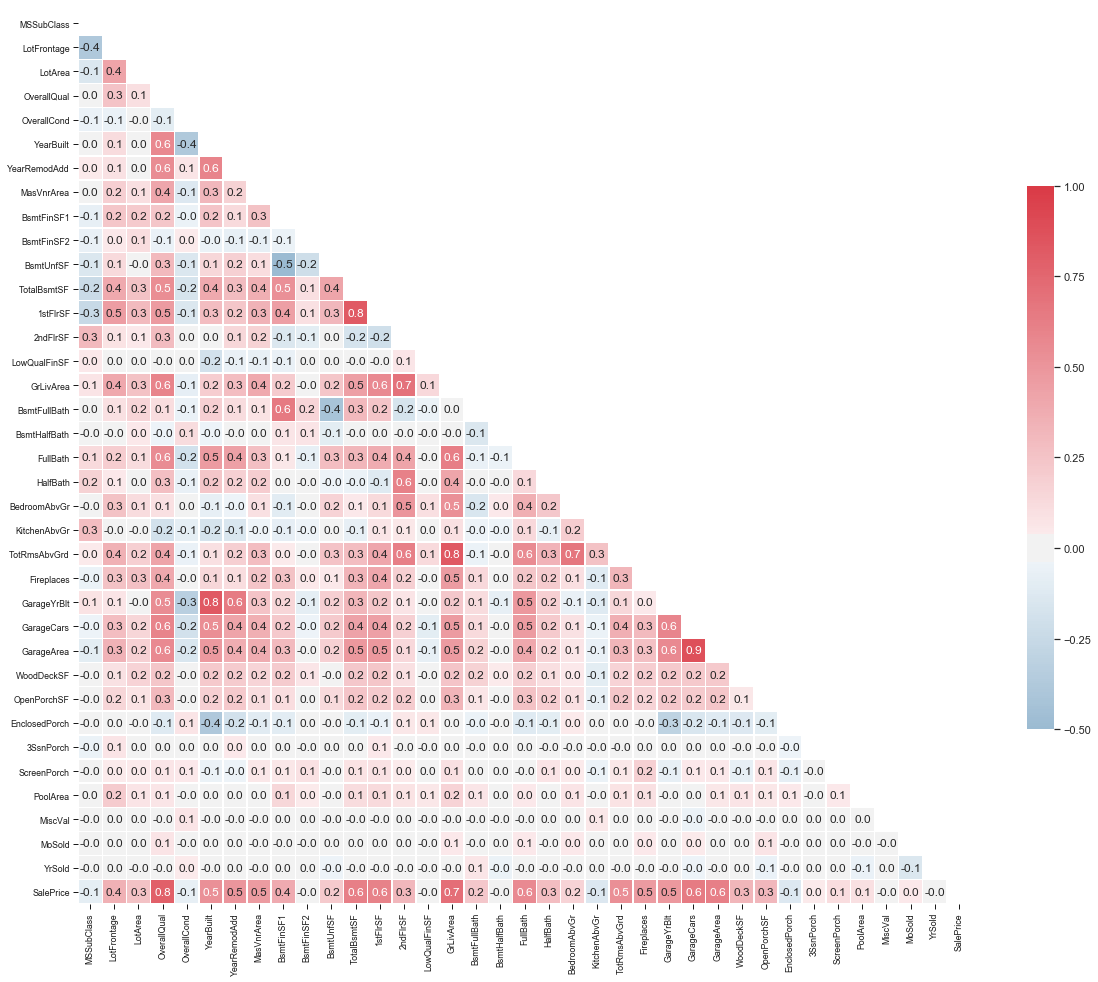

In [16]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")

### Distribution of Numeric Features

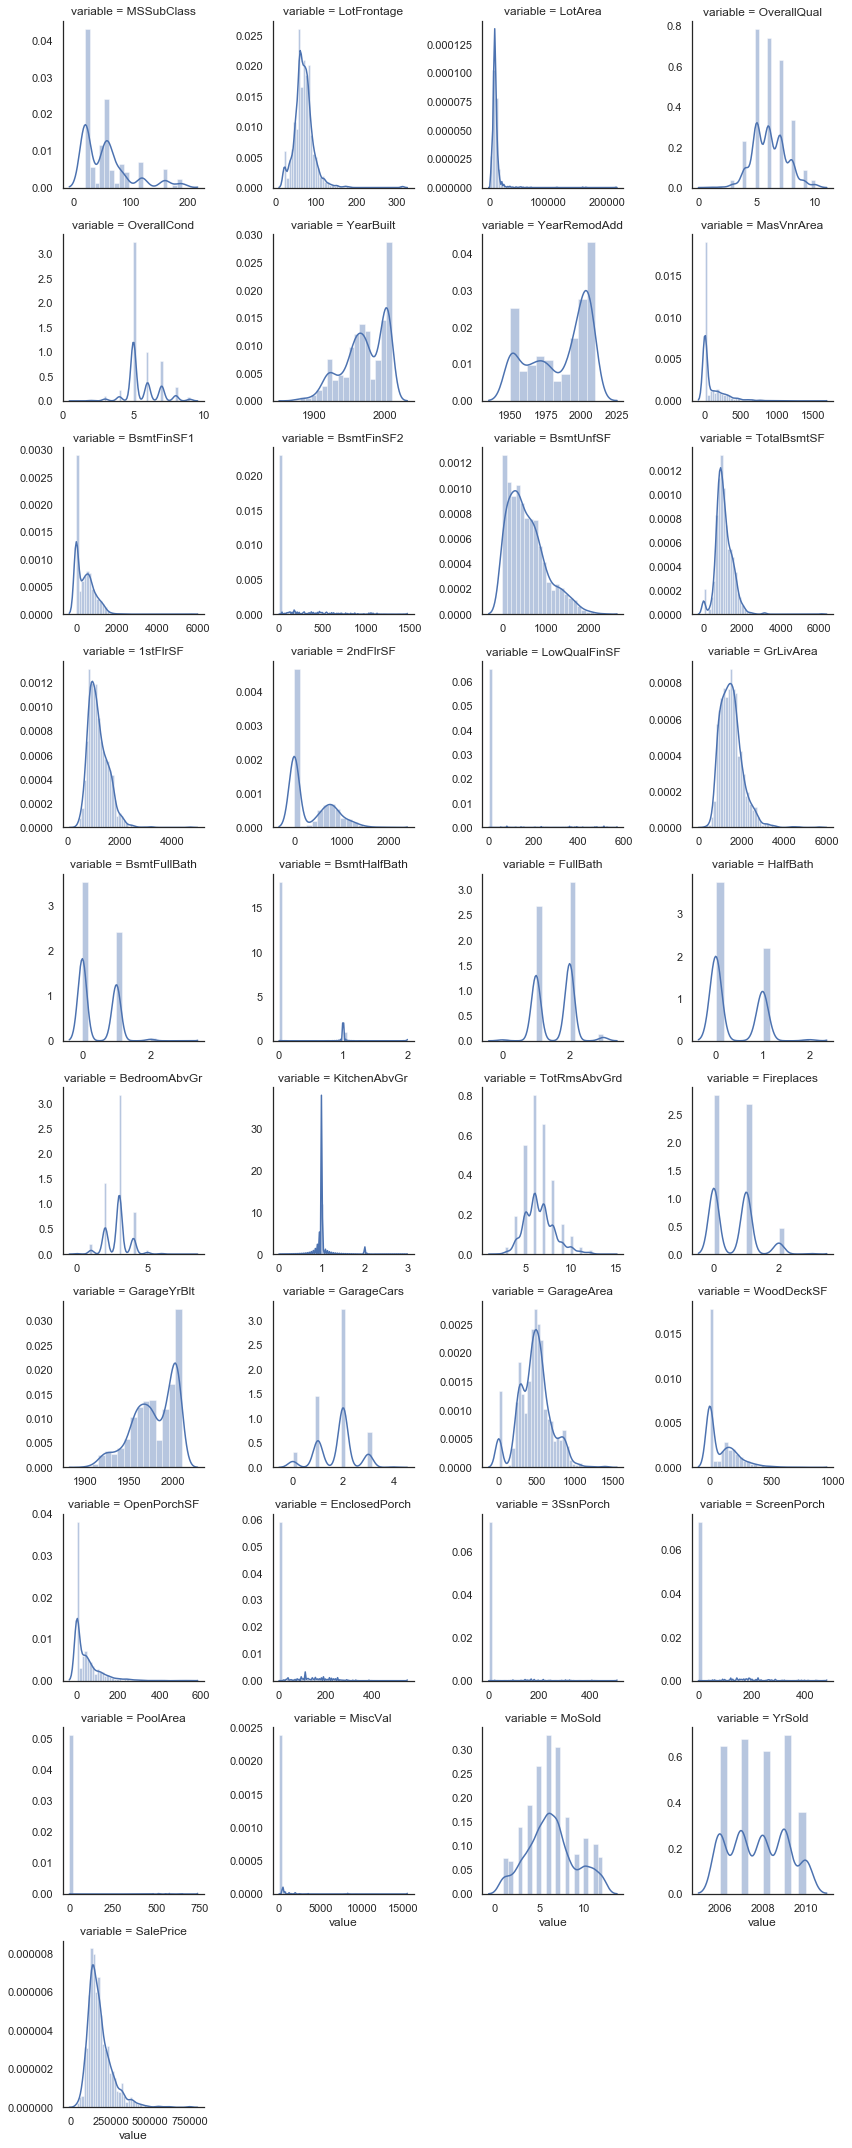

In [17]:
#create numeric plots
num_vars = [c for c in df.columns if df.dtypes[c] != 'object']
nd = pd.melt(df, value_vars = num_vars)
n = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n = n.map(sns.distplot, 'value')
n

### Distribution of Categorical Features

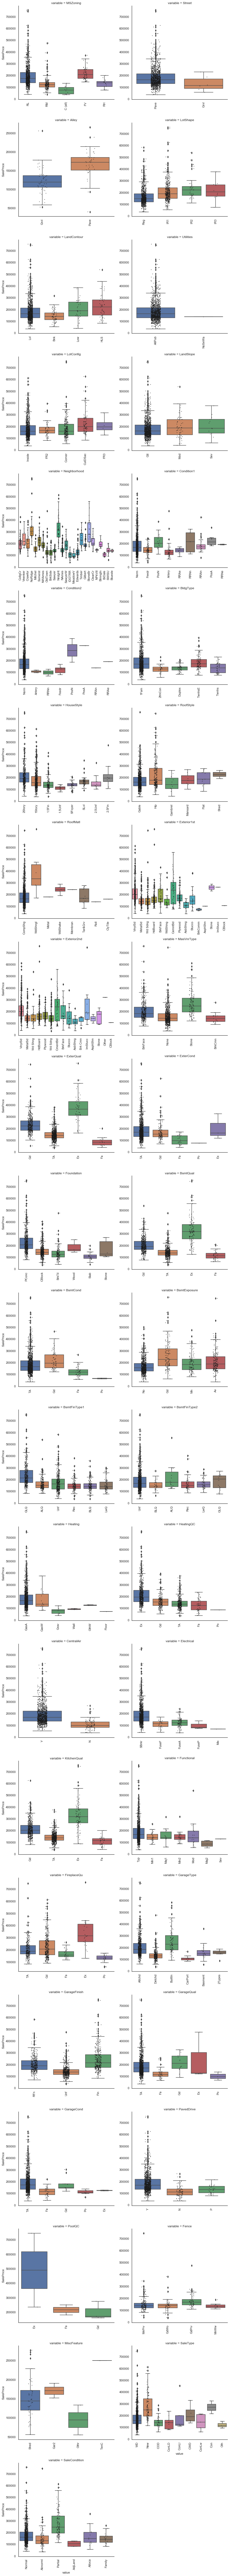

In [18]:
def stripplot(x,y,**kwargs):
            sns.stripplot(x=x,y=y,jitter=True,color=".1",size=2)
            x = plt.xticks(rotation=90)

def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat_vars = [c for c in df.columns if df.dtypes[c] == 'object']

p = pd.melt(df, id_vars='SalePrice', value_vars=cat_vars)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(boxplot, 'value','SalePrice')
g = g.map(stripplot, 'value','SalePrice')
g

In [19]:
df.groupby('Neighborhood').median()['SalePrice'].sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64

In [20]:
df.groupby('Neighborhood').mean()['SalePrice'].sort_values()

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

#### Month Sold

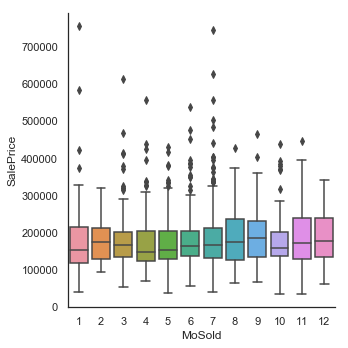

In [21]:
sns.catplot(x="MoSold", y="SalePrice", kind="box", data=df);

#### Year Built

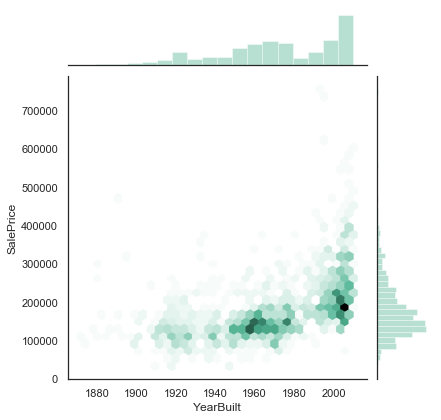

In [22]:
sns.jointplot(df['YearBuilt'], df['SalePrice'], kind="hex", color="#4CB391")

## Data Preprocessing

### Remove Outliers

The two most predictive features are OverallQual and GrLivArea. Since Overall Quality has a range of 1-10, GrLivArea is examined to detect possible outliers.

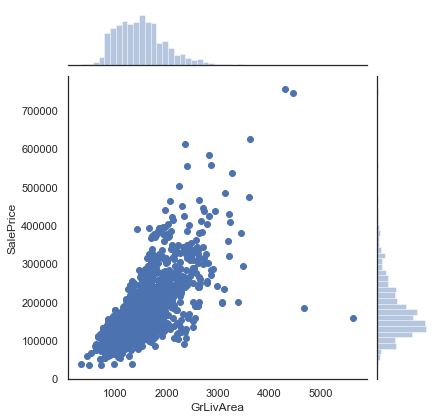

In [23]:
sns.jointplot("GrLivArea", "SalePrice", data=df)

Filter out data points with GrLivArea > 4500

In [24]:
df = df[df["GrLivArea"] <= 4500]

### Fill in Missing Values

#### Fill area and count features with zero

In [25]:
# features to fill na with zero
fill_zero = ['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageCars',
             'GarageArea', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageYrBlt']

# fill na with zero 
for col in fill_zero:
    df[col].fillna(0, inplace=True)

#### Fill continuous features with neighborhood mean

In [26]:
# featurs to fill na with neighborhood mean
fill_mean = ['LotFrontage']

for col in fill_mean:
    df[col] = df.groupby("Neighborhood").transform(lambda x: x.fillna(x.mean()))

#### Fill category features with mode

In [27]:
fill_mode = ['Electrical', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'Exterior1st', 'Exterior2nd']

for col in fill_mode:
    new_val = df[col].mode().values[0]
    df[col].fillna(new_val, inplace=True)

#### Fill ordinal features with 'Na' for encoding

In [28]:
fill_ord = ['PoolQC', 'FireplaceQu', 'GarageQual','GarageCond', 'BsmtCond', 'BsmtQual', 'KitchenQual']

for col in fill_ord:
    df[col].fillna('Na', inplace=True)

#### Fill category features with 'None' for encoding

In [29]:
fill_none = ['MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish', 'BsmtExposure', 'BsmtFinType2',
            'BsmtFinType1', 'MasVnrType']

for col in fill_none:
    df[col].fillna('None', inplace=True)

#### Confirm all missing values have been filled

In [30]:
df.count().sort_values().head()

MSSubClass     1458
GarageType     1458
FireplaceQu    1458
Fireplaces     1458
Functional     1458
dtype: int64

### Distribution of Sale Price

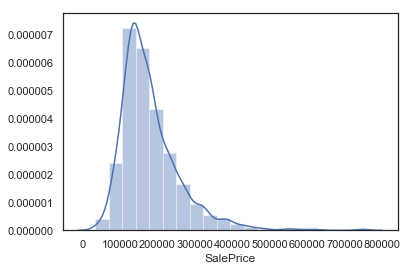

In [31]:
sns.distplot(df['SalePrice'], bins=20)

The data is right skew, but taking ln(1+x) of the data will normalize it.

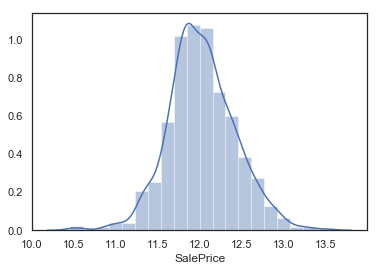

In [32]:
sns.distplot(np.log1p(df['SalePrice']), bins=20)

In [33]:
df["SalePrice"] = np.log1p(df['SalePrice'])

In [34]:
df_y = df.pop("SalePrice")

## Data Preprocessing

### Feature engineering

The first feature to engineer is the presence of a pool. Only 7 homes have a pool, so it makes sense to convert this to a categorical feature. 

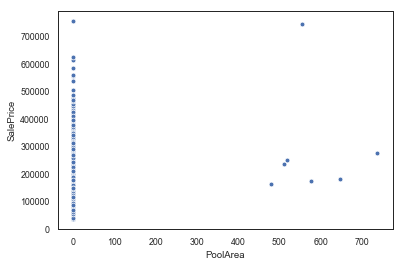

In [35]:
sns.set_context('paper')
sns.scatterplot(x="PoolArea", y="SalePrice", data=data)

#### TRANSFORM #1: 
- Drop 'PoolQC'
- Make 'PoolArea' a binary feature

In [36]:
# drop PoolQC
df.drop(columns=['PoolQC'], inplace=True)

In [37]:
df['PoolArea'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

Lot frontage is a component of the lot area calculation.

In [38]:
sns.set_context('paper')
sns.regplot(x=np.log1p(df['LotArea']), y=np.log1p(df['SalePrice']), data=data)

KeyError: 'SalePrice'

In [ ]:
sns.set_context('paper')
sns.regplot(x=np.log1p(df['LotFrontage']), y=np.log1p(df['SalePrice']), data=data)

I also examined if there was a correlation between lot area and sale price within a neighborhood, but this does not seem predictive either.

In [ ]:
g = sns.FacetGrid(data, col="Neighborhood", col_wrap=4, height=2)
g.map(sns.regplot, "SalePrice", "LotArea", ci=None);

#### Transform #2:
- Drop 'LotArea'
- Fill in missing values for 'LotFrontage'
- Take ln(x+1) of data

In [ ]:
# drop LotArea
df.drop(columns=['LotArea'], inplace=True)

In [ ]:
# replace na values with mean of neighborhood
df["LotFrontage"] = df.groupby("Neighborhood").transform(lambda x: x.fillna(x.mean()))
df["LotFrontage"]= np.log1p(df['LotFrontage'])

Gravel streets not common (6 houses) so this is changed to a binary feature.  

In [ ]:
sns.stripplot(x="Street", y="SalePrice", data=data)

#### Transform #3:
- Change street to binary feature variable {Grvl: 1. Pave: 0}

In [ ]:
df['Street'] = df['Street'].apply(lambda x: 1 if x == "Grvl" else 0)

In [ ]:
df['Street'].sum()

In [ ]:
sns.stripplot(x="Alley", y="SalePrice", data=df)

Alley added to one hot encode array

In [ ]:
sns.set_context('paper')
sns.violinplot(x="LotShape", y="SalePrice", data=df, palette="Blues")

#### Transformation #4:
- Change lotshape to binary regular/irregular

In [ ]:
df['LotShape'] = df['LotShape'].apply(lambda x: 0 if x == "Reg" else 1)

In [ ]:
sns.violinplot(x="LandContour", y=np.log1p(df["SalePrice"]), data=df, palette="Blues")

Add LandContour to one hot code array

In [ ]:
sns.stripplot(x="Utilities", y="SalePrice", data=df)

In [ ]:
df.drop(columns=['Utilities'], inplace=True)

#### Transformation #5:
- remove Utilities as a outlier feature, only 1 is not 'AllPub'


In [ ]:
sns.stripplot(x="LotConfig", y="SalePrice", data=df)

In [ ]:
sns.set_context('paper')
sns.violinplot(x="LotConfig", y="SalePrice", data=df, palette="Blues")

LotConfig added to one hot encoding array, look at dropping altogether.

In [ ]:
sns.stripplot(x="LandSlope", y="SalePrice", data=df)

In [ ]:
sns.set_context('paper')
sns.violinplot(x="LandSlope", y="SalePrice", data=df, palette="Blues")

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_context('talk')
sns.stripplot(x="Neighborhood", y="SalePrice", data=df)

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_context('paper')
sns.violinplot(x="Neighborhood", y="SalePrice", data=df)

Neighborhood added to one hot encode array.

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set_context('paper')
sns.stripplot(x="Condition2", y="SalePrice", data=df)

In [ ]:
df['Condition1'] = df['Condition1'].apply(lambda x: None if x == "Norm" else x)
df['Condition2'] = df['Condition2'].apply(lambda x: None if x == "Norm" else x)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Condition1'], prefix='Condition')],axis=1)
df.drop(['Condition1'],axis=1, inplace=True)

In [ ]:
for index, row in df.iterrows():
    if row['Condition2'] != 'Norm':
        if row['Condition2'] == 'Feedr':
            
            df.at[index, 'Condition_Feedr'] = 1
        
        if row['Condition2'] == 'Artery':
            df.at[index, 'Condition_Artery'] = 1
        
        if row['Condition2'] == 'RRNn':
            df.at[index, 'Condition_RRNn'] = 1
        
        if row['Condition2'] == 'RRAn':
            df.at[index, 'Condition_RRAn'] = 1
        
        if row['Condition2'] == 'PosN':
            df.at[index, 'Condition_PosN'] = 1
        
        if row['Condition2'] == 'PosA':
            df.at[index, 'Condition_PosA'] = 1
        
        if row['Condition2'] == 'RRNe':
            df.at[index, 'Condition_RRNe'] = 1
        
        if row['Condition2'] == 'RRAe':
            df.at[index, 'Condition_RRAe'] = 1
        

#### Transformation 6:
- Make Norm na for Condition1, condition2,
- One hot encode for non-na
- Combine columns so there is only one column for each conditional and a house can have more than 1

In [ ]:
sns.set_context('paper')
sns.stripplot(x="BldgType", y="SalePrice", data=df)

In [ ]:
sns.set_context('paper')
sns.violinplot(x="BldgType", y="SalePrice", data=df)

BldgType is added to the one hot encoding matrix.

In [ ]:
sns.set_context('paper')
sns.stripplot(x="HouseStyle", y="SalePrice", data=df)

HouseStyle added to one hot encoding array

In [ ]:
sns.set_context('paper')
sns.violinplot(x="HouseStyle", y="SalePrice", data=df)

In [ ]:
sns.set(color_codes=True)
sns.set_context('paper')
sns.distplot(df['OverallQual'], bins=10)

#### Transformation 7:
- normalize

In [ ]:
df['OverallQual'] = df['OverallQual'].fillna(5)
oq_mean = df['OverallQual'].mean()
oq_std = df['OverallQual'].std()
df['OverallQual'] = df['OverallQual'].apply(lambda x: (x - oq_mean) / oq_std)

In [ ]:
sns.set_context('paper')
sns.regplot(x='OverallQual', y=np.log1p(df['SalePrice']), data=df)

In [ ]:
sns.set(color_codes=True)
sns.set_context('paper')
sns.distplot(df['OverallCond'], bins=10)

#### Transformation: 8
- normalize

In [ ]:
df['OverallCond'] = df['OverallCond'].fillna(5)
oc_mean = df['OverallCond'].mean()
oc_std = df['OverallCond'].std()
df['OverallCond'] = df['OverallCond'].apply(lambda x: (x - oc_mean) / oc_std)

In [ ]:
sns.set_context('paper')
sns.regplot(x='OverallCond', y=np.log1p(df['SalePrice']), data=df)

In [ ]:
sns.set_context('paper')
sns.regplot(x="YearBuilt", y="SalePrice", data=df)

In [ ]:
sns.set_context('paper')
sns.regplot(x="YearRemodAdd", y="SalePrice", data=df)

In [ ]:
sns.set_context('paper')
sns.stripplot(x="RoofStyle", y="SalePrice", data=df)

In [ ]:
sns.set_context('paper')
sns.violinplot(x="RoofStyle", y="SalePrice", data=df)

RoofStyle added to one hot encode matrix

In [ ]:
sns.set_context('paper')
sns.stripplot(x="RoofMatl", y="SalePrice", data=df)

#### Transform: 
- drop roofMatl

In [ ]:
df.drop(columns=['RoofMatl'], inplace=True)

In [ ]:
sns.set_context('paper')
sns.violinplot(x="Foundation", y="SalePrice", data=df)

Foundation added to one hot matrix

In [ ]:
sns.set_context('paper')
sns.regplot(x='MasVnrArea', y=np.log1p(df['SalePrice']), data=data)

In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].apply(lambda x: 0 if x == 0 else 1)

#### Transformation
- Turn MasVnrArea to feature

In [ ]:
sns.set_context('paper')
sns.violinplot(x="ExterQual", y="SalePrice", data=df)

In [ ]:
df['ExterQual'] = df['ExterQual'].fillna('TA')
mask_1 = {'Ex':1, 'Gd':0.5, 'TA':0, 'Fa':-0.5, 'Po':-1}
df['ExterQual'].replace(mask_1, inplace=True)

#### Transformation
- fill na with average
- encode the ordinal values

In [ ]:
sns.set_context('paper')
sns.violinplot(x="ExterCond", y="SalePrice", data=df)

In [ ]:
df['ExterCond'] = df['ExterCond'].fillna('TA')
df['ExterCond'].replace(mask_1, inplace=True)

#### Transformation
- fill na with average
- encode the ordinal values

In [ ]:
sns.set_context('paper')
sns.violinplot(x="BsmtQual", y="SalePrice", data=df)
df['BsmtQual'].value_counts()

In [ ]:
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtQual'].replace(mask_1, inplace=True)

In [ ]:
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtCond'].replace(mask_1, inplace=True)

In [ ]:
sns.set_context('paper')
sns.violinplot(x="BsmtExposure", y="SalePrice", data=df)
df['BsmtExposure'].value_counts()

Add to one hot encode

In [ ]:
sns.set_context('paper')
sns.violinplot(x="BsmtFinType1", y="SalePrice", data=df)
df['BsmtFinType1'].value_counts()

In [ ]:
sns.set_context('paper')
sns.violinplot(x="BsmtFinType2", y="SalePrice", data=df)
df['BsmtFinType2'].value_counts()

added BsmtFinType1 and BsmtFinType2 to one hot encoding

In [ ]:
sns.set(color_codes=True)
sns.set_context('paper')
sns.distplot(df['BsmtFinSF1'])

In [ ]:
df['BsmtFinSF1'] = df['BsmtFinSF1']+df['BsmtFinSF2']
df.drop(columns=['BsmtFinSF2'], inplace=True)
df['BsmtFinSF1'] = df['BsmtFinSF1'].apply(lambda x: None if x == 0 else x)

In [ ]:
bf_mean = df['BsmtFinSF1'].mean()
bf_std = df['BsmtFinSF1'].std()
df['BsmtFinSF1'] = df['BsmtFinSF1'].apply(lambda x: (x - bf_mean) / bf_std)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)

In [ ]:
df['BsmtUnfSF'] = df['BsmtFinSF1'].apply(lambda x: None if x == 0 else x)

In [ ]:
bu_mean = df['BsmtUnfSF'].mean()
bu_std = df['BsmtUnfSF'].std()
df['BsmtUnfSF'] = df['BsmtUnfSF'].apply(lambda x: (x - bu_mean) / bu_std)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)

In [ ]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].apply(lambda x: None if x == 0 else x)

In [ ]:
bu_mean = df['TotalBsmtSF'].mean()
bu_std = df['TotalBsmtSF'].std()
df['TotalBsmtSF'] = df['TotalBsmtSF'].apply(lambda x: (x - bu_mean) / bu_std)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [ ]:
df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#### Transformations:
- normalize bsmt value
- add binary hasbsmt

In [ ]:
sns.set_context('paper')
sns.violinplot(x="Heating", y="SalePrice", data=df)
df['Heating'].value_counts()

In [ ]:
df['Heating'] = df['Heating'].apply(lambda x: 0 if x == "GasA" else 1)

#### Transformation:
- 1 if not GasA, 0 otherwise

In [ ]:
sns.set_context('paper')
sns.violinplot(x="HeatingQC", y="SalePrice", data=df)
df['HeatingQC'].value_counts()

In [ ]:
df['HeatingQC'] = df['HeatingQC'].fillna('TA')


In [ ]:
df['HeatingQC'].replace(mask_1, inplace=True)

#### Transformation:
- HeatingQC as mask 1

In [ ]:
sns.set_context('paper')
sns.violinplot(x="CentralAir", y="SalePrice", data=df)
df['CentralAir'].value_counts()

In [ ]:
df['CentralAir'] = df['CentralAir'].apply(lambda x: 0 if x == "Y" else 1)

In [ ]:
df['CentralAir'].value_counts()

In [ ]:
sns.set_context('paper')
sns.violinplot(x="Electrical", y="SalePrice", data=df)
df['Electrical'].value_counts()

In [ ]:
df['Electrical'] = df['Electrical'].apply(lambda x: 0 if x == "SBrkr" else 1)

In [ ]:
df['Electrical'].value_counts()

In [ ]:
sns.set_context('paper')
sns.regplot(x='1stFlrSF', y=np.log1p(df['SalePrice']), data=df)

In [ ]:
sns.set_context('paper')
sns.regplot(x='LowQualFinSF', y=np.log1p(df['SalePrice']), data=df)

In [ ]:
df['TotalSqft'] = df['1stFlrSF'] + df['2ndFlrSF']
df.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)

In [ ]:
df['TotalSqft'] = np.log1p(df['TotalSqft'])

In [ ]:
sns.distplot(df['TotalSqft'])

In [ ]:
df['LowQualFinSF'] = df['LowQualFinSF'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df['LowQualFinSF'].value_counts()

### Transformation: 
- drop living area, correlated with totalsqft

In [ ]:
df.drop(columns=['GrLivArea'], inplace=True)

In [ ]:
df['TotalBath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'] + df['FullBath'] + 0.5 * df['HalfBath']

In [ ]:
df.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

#### Transformation:
- subtract 1 from kitchen

In [ ]:
df['KitchenAbvGr'] = df['KitchenAbvGr'].apply(lambda x: x-1)

In [ ]:
df['KitchenQual'] = df['KitchenQual'].fillna('TA')

In [ ]:
df['KitchenQual'].replace(mask_1, inplace=True)

In [ ]:
df['Functional'].value_counts()
sns.violinplot(x="Functional", y="SalePrice", data=df)

### Transformation
- fill in None with 'TA'
- add to one hot encode

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('TA')
sns.violinplot(x='FireplaceQu', y=np.log1p(df['SalePrice']), data=data)

In [ ]:
df['GarageType'] = df['GarageType'].fillna('No_Garage')
sns.violinplot(x='GarageType', y=np.log1p(df['SalePrice']), data=df)

In [ ]:
df.drop(columns=['GarageYrBlt'], inplace=True)

In [ ]:
df['GarageFinish'] = df['GarageFinish'].fillna('No_Garage')
sns.violinplot(x='GarageFinish', y=np.log1p(df['SalePrice']), data=df)

In [ ]:
sns.violinplot(x='GarageCars', y=np.log1p(df['SalePrice']), data=df)

### Preliminary correlation analysis

### Remove highly correlated features

- Remove 'GarageArea', highly correlated with 'GarageCars' (0.88)
- remove 'GarageYearBlt', highly correlated with 'YearBuilt' (0.83)

In [ ]:
# features with >10% of value na
high_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

# features with high correlation to other features
high_corr = ['TotRmsAbvGrd', ]

# drop GarageArea, GarageYrBlt and TotalBsmtSF
df.drop(columns=['GarageArea'], inplace=True)
df_t.drop(columns=['GarageArea'], inplace=True)

In [ ]:
# divide categorical variables into nominal, ordinal
nominal_encode = ['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig',
            'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
            'Electrical', 'Functional', 'FireplaceQu', 'GarageCars', 'GarageType', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold',
            'SaleType', 'SaleCondition', 'Fence']

ordinal_encode_standard = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC']

ordinal_encode_other = ['BsmtExposure', , 'GarageFinish']

binning = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [ ]:
pp = sns.pairplot(data=data,
                  y_vars=['SalePrice'],
                  x_vars=nominal_encode)

In [ ]:
pp = sns.pairplot(data=data,
                  y_vars=['SalePrice'],
                  x_vars=ordinal_encode_standard)

In [ ]:
# one hot encoding train data
for col in nominal_encode:
    df = pd.concat([df,pd.get_dummies(df[col], prefix=col)],axis=1)
    df.drop([col],axis=1, inplace=True)

In [ ]:
# one hot encoding test data
for col in nominal_encode:
    df_t = pd.concat([df_t,pd.get_dummies(df_t[col], prefix=col)],axis=1)
    df_t.drop([col],axis=1, inplace=True)

In [ ]:
mask_2 = {'Gd':1, 'Av':0, 'Mn':-0.5, 'No':1}
mask_3 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
mask_4 = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}

In [ ]:
# ordinal encoding for standard codes train data
for col in ordinal_encode_standard:
    df[col].replace(mask_1, inplace=True)

In [ ]:
# ordinal encoding for standard codes test data
for col in ordinal_encode_standard:
    df_t[col].replace(mask_1, inplace=True)

In [ ]:
# ordinal encoding for special codes, train data
df['BsmtExposure'].replace(mask_2, inplace=True)
df['BsmtFinType1'].replace(mask_3, inplace=True)
df['BsmtFinType2'].replace(mask_3, inplace=True)
df['GarageFinish'].replace(mask_4, inplace=True)

In [ ]:
# ordinal encoding for special codes, test data
df_t['BsmtExposure'].replace(mask_2, inplace=True)
df_t['BsmtFinType1'].replace(mask_3, inplace=True)
df_t['BsmtFinType2'].replace(mask_3, inplace=True)
df_t['GarageFinish'].replace(mask_4, inplace=True)

In [ ]:
# make sure test data has the same columns
for col in df.columns:
    if col not in df_t.columns:
        df_t[col] = 0

In [ ]:
for col in df_t.columns:
    if col not in df.columns:
        df_t.drop(col,axis=1, inplace=True)

In [ ]:
# format for regression, train data
y_train = df['SalePrice'].fillna(0).to_numpy()
x_train = df.drop('SalePrice', axis=1).fillna(0).to_numpy()

In [ ]:
# format for regression, train data
x_test = df_t.drop('SalePrice', axis=1).fillna(0).to_numpy()

In [ ]:
reg = linear_model.Lasso(alpha=0.5)
reg.fit(x_train, y_train)

In [ ]:
y_test = reg.predict(x_test)

In [ ]:
list(y_test)

In [ ]:
# calculate a correlation matrix for the data
corr = df.corr()

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 100))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
dt = df.to_numpy()

In [ ]:
ax = sns.violinplot(x="MSSubClass", y="SalePrice", data=data, linewidth=0) 

In [ ]:
sns.jointplot("1stFlrSF", "SalePrice", data=data, kind="hex")
sns.jointplot("2ndFlrSF", "SalePrice", data=data, kind="hex")

In [ ]:
target = pd.DataFrame(df, columns=["SalePrice"])
target.to_numpy(dtype=object)

In [ ]:
features = df.drop(columns=['SalePrice'])

### Ordinary Least Squares Regression

Fits a linear model with to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(features, target)